# Projeto 1 - Ciencia dos Dados

## Com o avanço da tecnologia o acesso a informações tem se tornado algo fácil. Como esse  acesso tem influenciado o idh de um país?



##### Gianlucca de la Torre Napolitano


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
# lendo arquivos

pc = pd.read_excel('indicator Personal computers per 100 population (ITU estimates_MDG) .xls.xlsx')
net = pd.read_excel('Internet user total.xlsx')
idh = pd.read_excel('hdi_human_development_index.xlsx')

In [5]:
# escolhedo o ano

pc_2005 = pc.loc[:,["PC per 100",2005]]
idh_2005 = idh.loc[:,["geo",2005]]
net_2005 = net.loc[:,["Internet users, total number","2005"]]

In [6]:
#trocando o index

idh_idz = idh_2005.set_index('geo')
net_idz = net_2005.set_index('Internet users, total number')
pc_idz = pc_2005.set_index('PC per 100')

In [7]:
# mundando o nome das colunas

idh_idx = idh_idz.rename(index=str, columns=lambda column: "IDH " + str(column))
net_idx = net_idz.rename(index=str, columns=lambda column: "Internet " + str(column))
pc_idx = pc_idz.rename(index=str, columns=lambda column: "Comp/ pessoa " + str(column))

In [8]:
# join dos dataframe

df = pc_idx.join(net_idx, how='inner')
DATA = df.join(idh_idx, how='inner')


In [9]:
Projeto_1 = DATA.dropna(thresh=3)   

In [10]:
# Savando em xlsx e csv

Projeto_1.to_excel("Projeto 1.xlsx", index = True)
Projeto_1.to_csv("Projeto 1.csv", index = True)

In [11]:
Projeto_1["Comp/ pessoa 2005 log"] = np.log(Projeto_1['Comp/ pessoa 2005'])
Projeto_1["IDH 2005 log"] = np.log(Projeto_1['IDH 2005'])
Projeto_1["Internet 2005 log"] = np.log(Projeto_1['Internet 2005'])

/Users/gian.napolitano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gian.napolitano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gian.napolitano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Gráfico 1


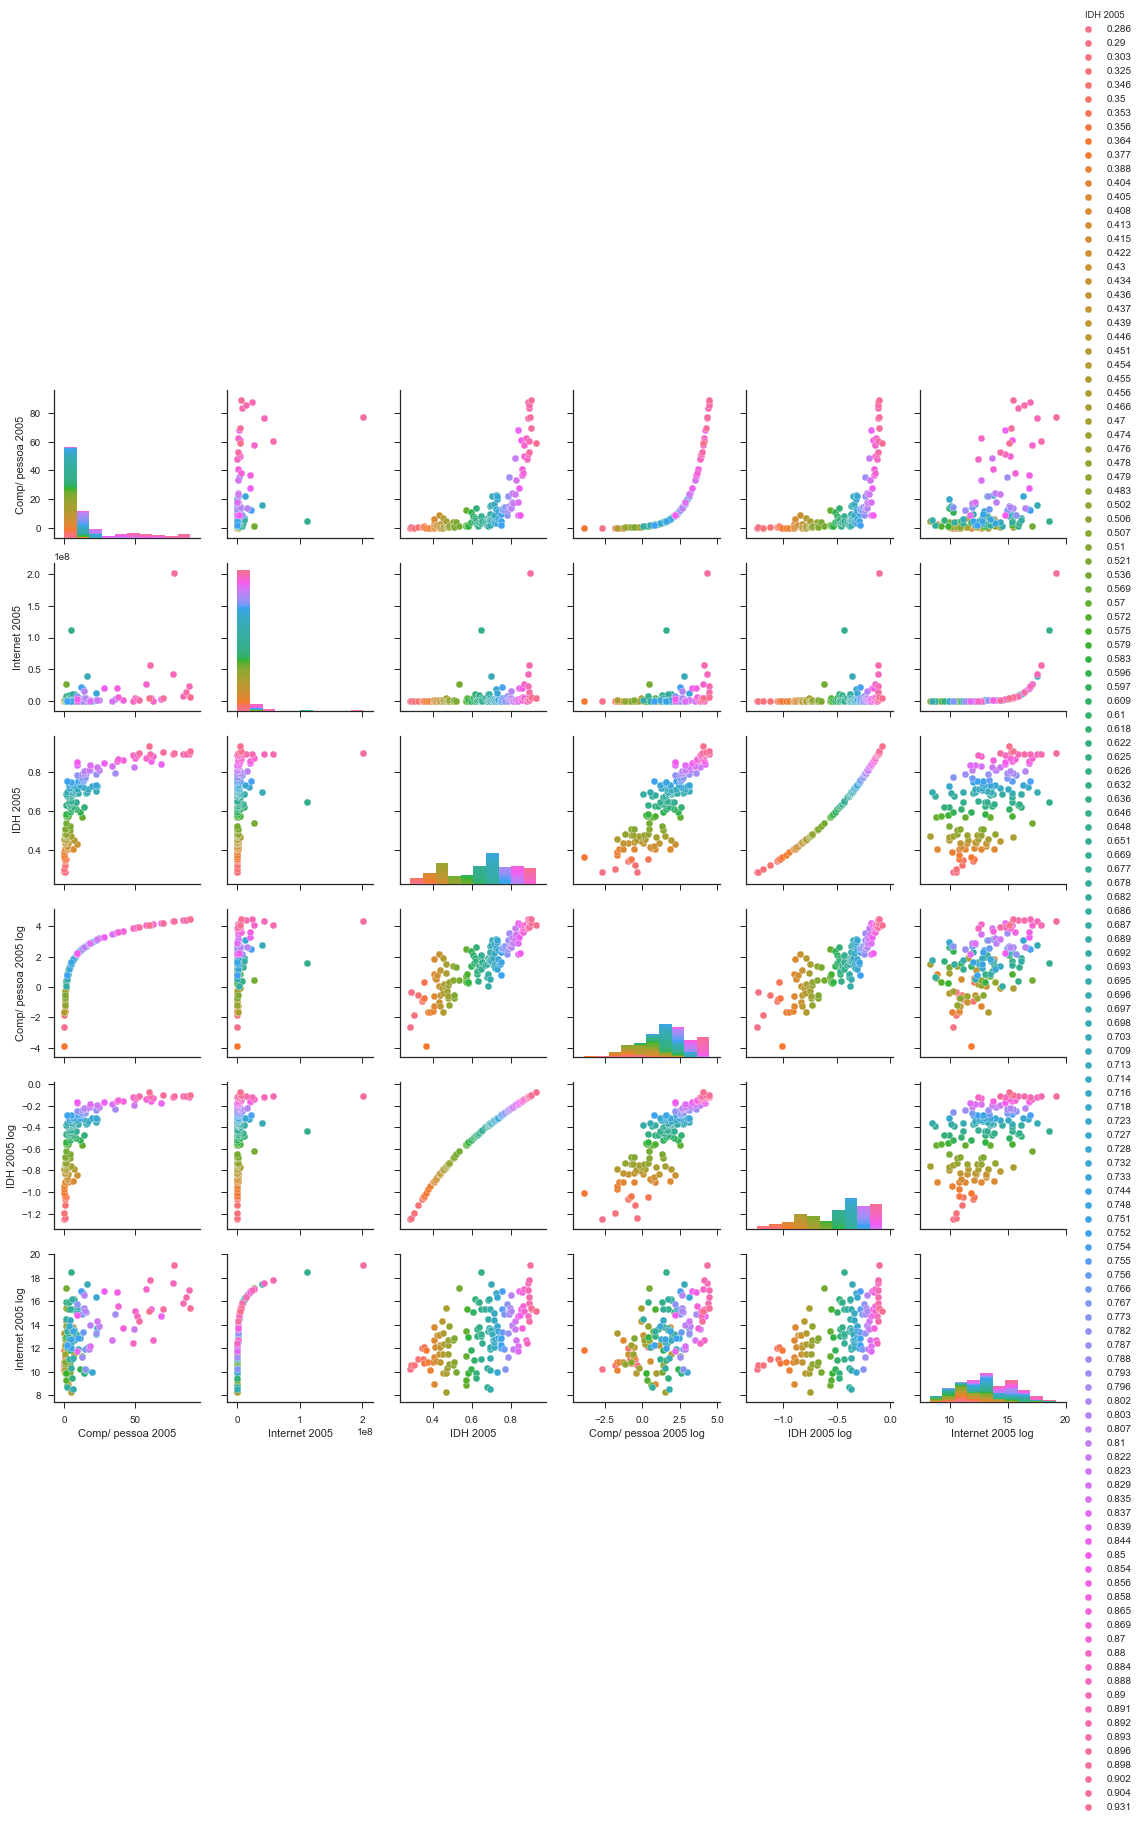

In [12]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(Projeto_1, hue="IDH 2005")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

In [13]:
teste = Projeto_1.corr()

In [14]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('2005')
    plt.xlabel('COMP/ PESSOA')
    plt.ylabel('IDH')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

In [15]:
def reta1(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('2005')
    plt.xlabel('INTERNET')
    plt.ylabel('IDH')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

In [16]:
teste

,Comp/ pessoa 2005,Internet 2005,IDH 2005,Comp/ pessoa 2005 log,IDH 2005 log,Internet 2005 log
Comp/ pessoa 2005,1.000000,0.347291,0.700984,0.766234,0.630045,0.493131
Internet 2005,0.347291,1.000000,0.237126,0.251011,0.218346,0.511429
IDH 2005,0.700984,0.237126,1.000000,0.877007,0.990001,0.538002
Comp/ pessoa 2005 log,0.766234,0.251011,0.877007,1.000000,0.860994,0.504643
IDH 2005 log,0.630045,0.218346,0.990001,0.860994,1.000000,0.521042
Internet 2005 log,0.493131,0.511429,0.538002,0.504643,0.521042,1.000000


Gráfico 2

Ajuste linear entre X3 e X4:
Coeficiente linear: -0.7134848642913397
Coeficiente angular: 0.14770131320152935


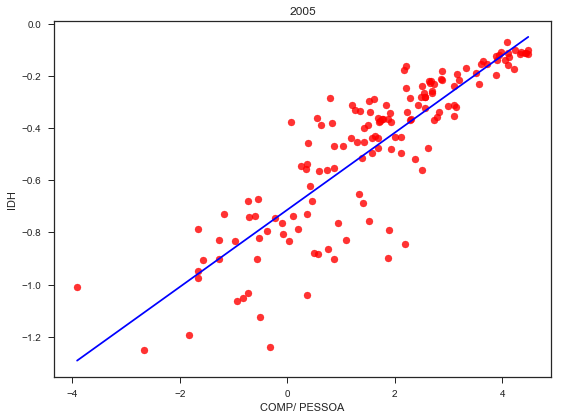

In [21]:
reta(Projeto_1['Comp/ pessoa 2005 log'], Projeto_1['IDH 2005 log'])

Gráfico 3

Ajuste linear entre X3 e X4:
Coeficiente linear: -1.3354085730012009
Coeficiente angular: 0.06526225508564633


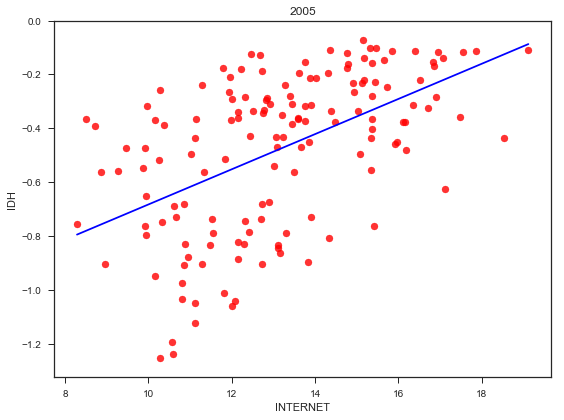

In [18]:
reta1(Projeto_1['Internet 2005 log'], Projeto_1['IDH 2005 log'])

Gráfico 4 - Histograma

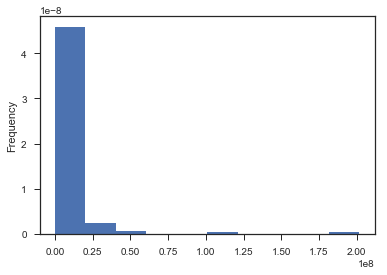

In [22]:
Projeto_1["Internet 2005"].plot.hist(density = True);

## Relatório


   O avanço da tecnologia tem trazido mudanças ao mundo nas ultimas décadas. Isso tem possibilitado o fácil acesso a informação, seja ela pelo celular, computador ou tablet. Em um dos gráficos, podemos observar que em 2006, o Canada se destaca em primeiro. Isso se deve ao fato de desde os anos 70 o Canada tem uma forte contribuição tecnológica para o mundo, sendo as mais conhecidas a criação da linguagem de programação JAVA, e o WATEFOR que foi muito utilizado para o ensino de computação (The canadian encyclopedia). Para garantir esse acesso, a internet tem que estar disponível nas mais diversas regiões e áreas de um país.
   
   Para conseguir os gráficos e o Data Frame, foram feitos alguns passos. Primeiramente, foi escolhido dois índices e seus arquivos foram lidos, logo apos, fez-se uma pergunta a qual futuramente seria respondida através dos dados dos indicadores. Escolheu-se então o ano com dados o suficiente para fazer as comparações com o IDH. Apos escolhido os indicadores, basta renomear as colunas e juntar todos os dados em um único Data Frame. Em seguida, retirou-se os países que não possuíam todos as três informações. Para finalizar, salvou o Data Frame em .xlsx e .csv. Com os dados salvos, basta agora plotar os gráficos e escolher os melhores para responder à pergunta.   
   
   Como podemos observar no gráfico 2, o gráfico tem uma dispersāo de 0,8 e a reta se comporta como uma associaçāo positiva , revelando que países cujo o idh tem um valor mais elevado, tende-se a ter uma quantidade maior de computadores a cada 100 pessoas. Podemos tirar uma conclusão de que nesses países o acesso a computadores é facilitado devido a baixo custo de equipamentos eletrônicos, como por exemplo um computador. Isso mostra que as pessoas não têm uma dificuldade na hora de buscar informações, estando com ela sempre bem próxima e rápida para acessar.
   
   Já olhando para o gráfico 3, a reta continua seguindo uma tendência crescente porem com uma dispersāo de 0,5, mostrando assim que não a uma relação tão forte entre o IDH de um país e o acesso a internet. Mesmo com essa baixa relação entre os dois, podemos falar que os países com um IDH mais baixo, são os que possuem, em sua maioria, um menor acesso a internet. Porem, é preciso levar em conta que o terceiro gráfico é dado a partir do número total de pessoas que tem acesso a internet em um país, por isso, deve-se tomar cuidado na hora da analise, pois ao plotarmos o histograma, temos uma acumulo no lado esquerdo, mostrando que países com alta porcentagem da população com acesso a internet, continuam com baixo índice devido a sua população ser pequena.
   
   Apos as analises dos dados, conseguimos concluir que países que tem uma porcentagem maior de computadores a cada 100 pessoas, tem uma relação mais direta com o IDH se ao compararmos com o numero de pessoas com acesso a internet. Isso se deve ao fato de que os dados fornecidos sobre a internet não estão em porcentagem, e sim no numero total de pessoas no país com acesso. Se analisássemos o gráfico da internet, porem em porcentagem da população com acesso teríamos um gráfico muito parecido com o gráfico do computador onde a linha e crescente e está com o valor bem próximo a 1. Mostrando assim que o acesso a informaçāo tem uma relacao direta com o idh de um país.
